In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import math

### Load Data

In [2]:
patient_df = pd.read_csv('data/patient.csv')

### Covert Dates

In [3]:
patient_df.released_date = pd.to_datetime(patient_df.released_date)
patient_df.confirmed_date = pd.to_datetime(patient_df.confirmed_date)
patient_df.deceased_date = pd.to_datetime(patient_df.deceased_date)


### Symtoms

In [4]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))

### Bar plot

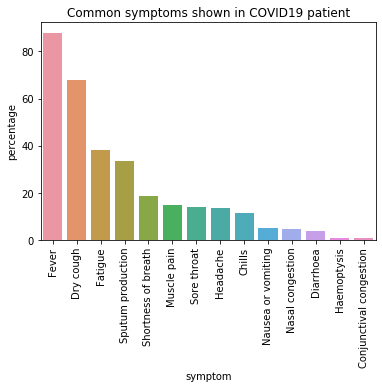

In [5]:
sns.barplot(x=symptoms.symptom, y=symptoms.percentage)
plt.title("Common symptoms shown in COVID19 patient")
plt.xticks(rotation=90)
plt.show()

### Pie Chart

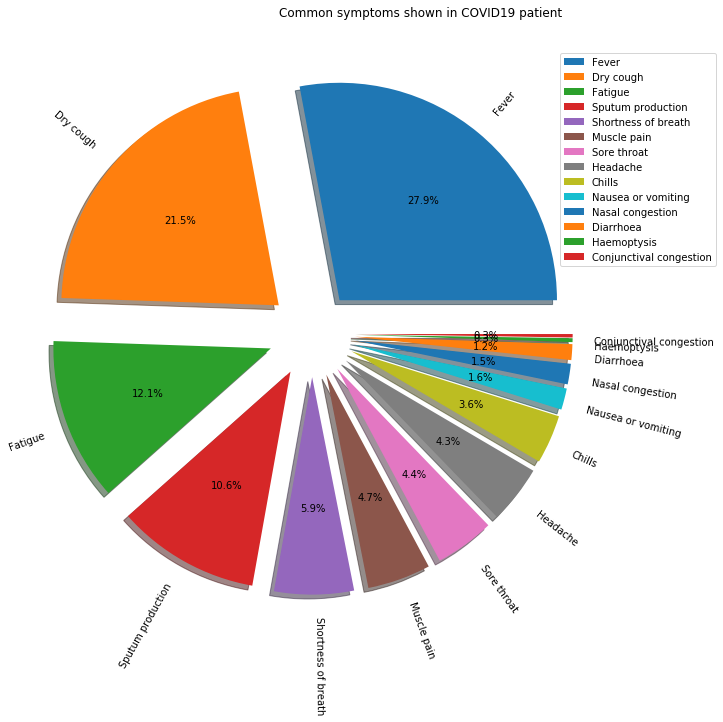

In [6]:
fig, ax = plt.subplots()
# plt.figure(figsize=(20,20))
ax.pie(x=symptoms.percentage, 
       labels=symptoms.symptom, 
       autopct="%1.1f%%", # Shows numbers
       pctdistance=0.6, # location of numbers form origin
       explode=np.ones(14)*0.2, #Sliting of wedge
       frame=True, # Should graph change with its frame provided by plt
       shadow=True,
       rotatelabels=True
       #        radius= 1.01,
       #        center = (1,0),
      )

plt.title("Common symptoms shown in COVID19 patient",pad=100)
plt.legend(loc='center',
           bbox_to_anchor=(1.5,0.8), 
#            bbox_transform=plt.gcf().transFigure
          )
plt.axis('off')
plt.show()

### Investigate Patient Data

In [7]:
patient_df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released


In [8]:
patient_df.isna().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [9]:
patient_df.dtypes

id                           int64
sex                         object
birth_year                 float64
country                     object
region                      object
group                       object
infection_reason            object
infection_order            float64
infected_by                float64
contact_number             float64
confirmed_date      datetime64[ns]
released_date       datetime64[ns]
deceased_date       datetime64[ns]
state                       object
dtype: object

### Calculate Age using birth_year

In [10]:
patient_df['age'] = 2020 - patient_df['birth_year']

### Age range

In [11]:
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"

In [12]:
patient_df['age_group'] = patient_df.age.apply(group_age)

In [13]:
patient_df['age'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5323     True
5324     True
5325     True
5326     True
5327     True
Name: age, Length: 5328, dtype: bool

### Time to recover since confirmed

In [14]:
patient_df['time_to_recover_since_confirmed'] = patient_df['confirmed_date'] - patient_df['released_date']
patient_df['time_to_death_since_confirmed'] = patient_df['confirmed_date'] - patient_df['deceased_date']

### Accumulated confirmed count

In [15]:
accumulated_confirmed_count = patient_df.confirmed_date.value_counts().sort_index(ascending=True).cumsum()

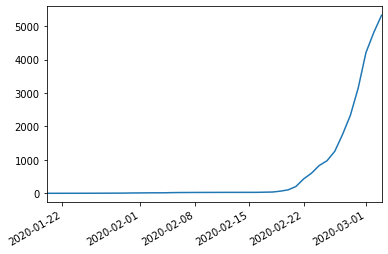

In [16]:
accumulated_confirmed_count.plot()

### Time series analysis

In [17]:
time = pd.read_csv("data/covid_19_data.csv", index_col='SNo')


In [18]:
time = time[time['Country/Region'] == 'South Korea']
time = time.tail(14)

In [19]:
time.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
49696,06/25/2020,NaN,South Korea,2020-06-26 04:33:43,12602.0,282.0,11172.0
50425,06/26/2020,NaN,South Korea,2020-06-27 04:33:35,12653.0,282.0,11317.0
51154,06/27/2020,NaN,South Korea,2020-06-28 04:34:04,12715.0,282.0,11364.0
51883,06/28/2020,NaN,South Korea,2020-06-29 04:33:44,12757.0,282.0,11429.0
52612,06/29/2020,NaN,South Korea,2020-06-30 04:33:48,12800.0,282.0,11537.0


### Confirmed vs Recovery vs Death

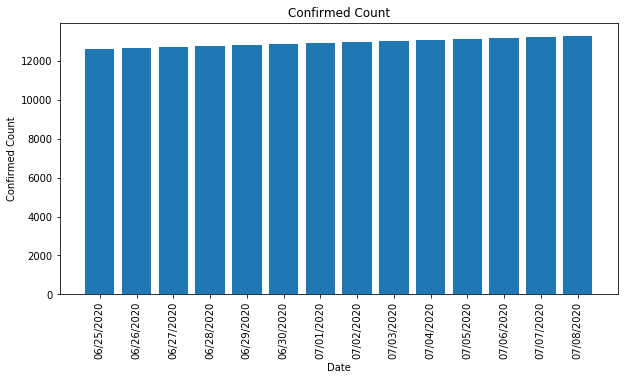

In [20]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('Confirmed Count')
plt.xlabel('Date')
plt.ylabel('Confirmed Count')
plt.bar(x='ObservationDate', height='Confirmed',data=time)
plt.show()

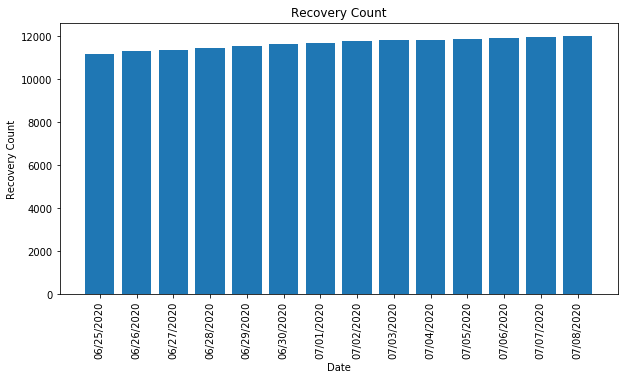

In [21]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('Recovery Count')
plt.xlabel('Date')
plt.ylabel('Recovery Count')
plt.bar(x='ObservationDate', height='Recovered',data=time)
plt.show()

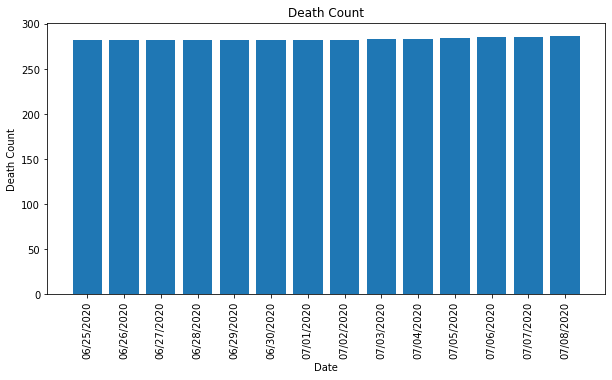

In [22]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('Death Count')
plt.xlabel('Date')
plt.ylabel('Death Count')
plt.bar(x='ObservationDate', height='Deaths',data=time)
plt.show()

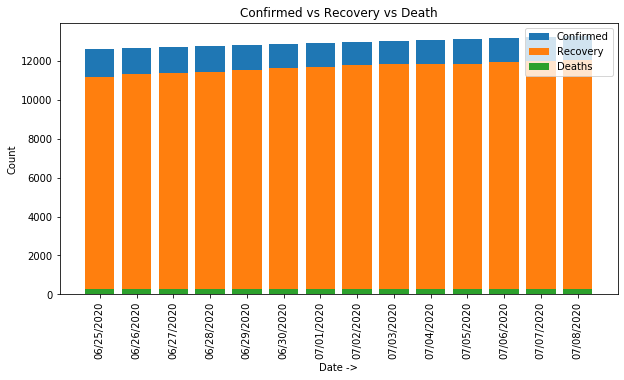

In [23]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('Confirmed vs Recovery vs Death')
plt.xlabel('Date ->')
plt.ylabel('Count')
plt.bar(x=time['ObservationDate'], height=time['Confirmed'], label='Confirmed')
plt.bar(x=time['ObservationDate'], height=time['Recovered'], label='Recovery')
plt.bar(x=time['ObservationDate'], height=time['Deaths'],label='Deaths')
plt.legend(frameon=True, loc='upper right') #Decide weather legend have frame visible
plt.show()

### Active cases

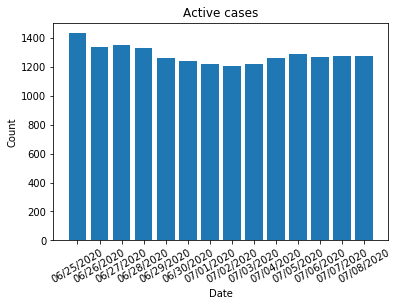

In [24]:
time['active_cases'] = time['Confirmed'] - time['Recovered']
plt.bar(x=time['ObservationDate'], height= time['active_cases'])
plt.title("Active cases")
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

### States of person

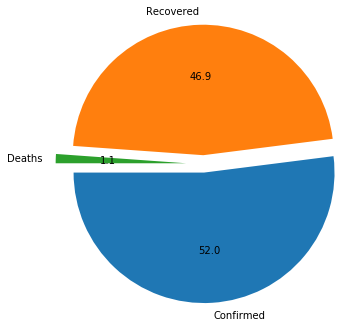

In [25]:
total_counts = {
    'TotalConfirmed' : time['Confirmed'].sum(),
    'TotalRecovered' : time['Recovered'].sum(),
    'TotalDeaths' : time['Deaths'].sum()
}

fig, ax = plt.subplots()
ax.pie([time['Confirmed'].sum(),time['Recovered'].sum(),time['Deaths'].sum()],
        labels=['Confirmed', 'Recovered', 'Deaths'],
        autopct="%1.1f",
        radius=1.5,explode=[0.1,0.1,0.2],
        startangle=180)
plt.show()

### Daily new cases 

In [26]:
time['Confirmed_new'] = time['Confirmed'] - time['Confirmed'].shift(1)
time['Recovered_new'] = time['Recovered'] - time['Recovered'].shift(1)
time['Deaths_new'] = time['Deaths'] - time['Deaths'].shift(1)


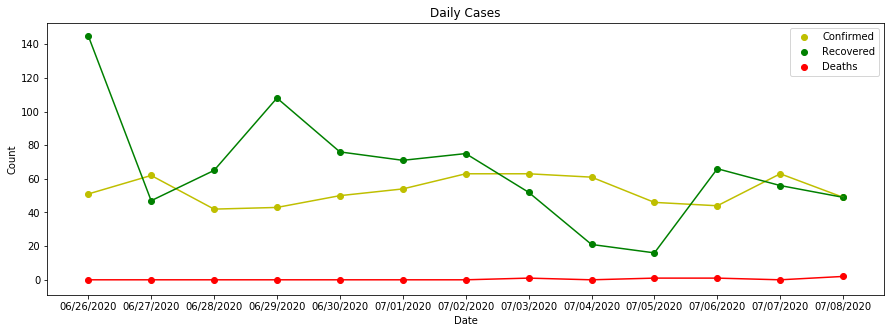

In [27]:
plt.figure(figsize = (15, 5))
plt.scatter(time['ObservationDate'],time['Confirmed_new'],color='y', label = 'Confirmed')
plt.scatter(time['ObservationDate'],time['Recovered_new'], color='g', label = 'Recovered')
plt.scatter(time['ObservationDate'],time['Deaths_new'], color='r', label = 'Deaths')
plt.plot(time['ObservationDate'],time['Confirmed_new'],color='y')
plt.plot(time['ObservationDate'],time['Recovered_new'], color='g')
plt.plot(time['ObservationDate'],time['Deaths_new'], color='r')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Cases')
plt.legend()

plt.show()

### Age distribution of Death

Text(0.5, 0, 'Age')

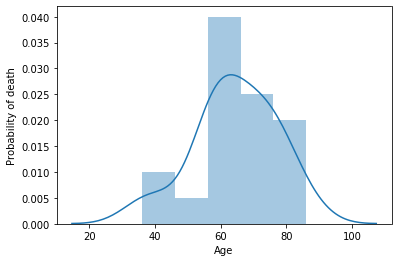

In [28]:
deaths = patient_df[patient_df['state'] == 'deceased']
sns.distplot(deaths['age'])
plt.ylabel('Probability of death')
plt.xlabel('Age')

In [29]:
patient_df['state'].value_counts()

isolated    5273
released      35
deceased      20
Name: state, dtype: int64

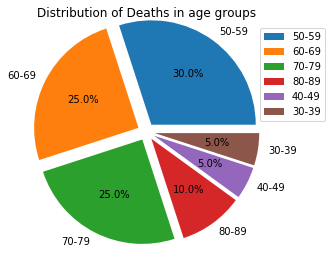

In [30]:
fig, ax = plt.subplots()
# patient_df['age_group'].value_counts()
death_groups = deaths[deaths['age_group'] != 'Unknown']['age_group'].value_counts()
ax.pie(death_groups,
       explode=np.ones(death_groups.count()) * 0.1,
       autopct='%1.1f%%',
       labels=death_groups.index,
       radius=1.2)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Distribution of Deaths in age groups')
plt.show()

Text(0.5, 1.0, 'Age distribution of deaths by gender')

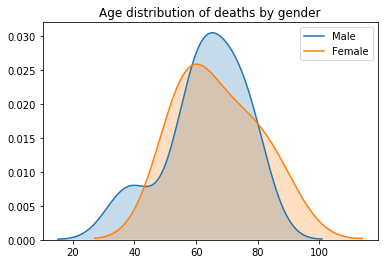

In [46]:
sns.kdeplot(deaths[deaths['sex'] == 'male']['age'], shade=True, label="Male")
sns.kdeplot(deaths[deaths['sex'] == 'female']['age'], shade=True, label='Female')
plt.title('Age distribution of deaths by gender')

Text(0.5, 1.0, 'Age distribution of deaths by gender')

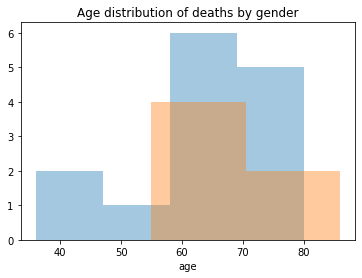

In [47]:
sns.distplot(deaths[deaths['sex'] == 'male']['age'], label="Male", kde=False)
sns.distplot(deaths[deaths['sex'] == 'female']['age'], label='Female', kde=False)
plt.title('Age distribution of deaths by gender')

### Age distribution of released by gender

In [48]:
released_df = patient_df[patient_df['state'] == 'released']

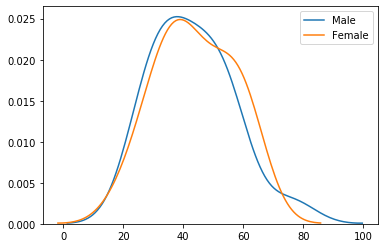

In [49]:
sns.kdeplot(released_df[released_df['sex'] == 'male']['age'], label='Male')
sns.kdeplot(released_df[released_df['sex'] == 'female']['age'], label='Female')

### Percentatge of deaths and recovery with age group

In [172]:
grouped_states = patient_df.groupby(['age_group','state']).count()['id'].unstack()
grouped_states = grouped_states[grouped_states.index.values != 'Unknown']
grouped_states.fillna(0,inplace=True)

In [194]:
grouped_states

state,deceased,isolated,released
age_group,,,
0-9,0.0,2.0,0.0
10-19,0.0,7.0,0.0
20-29,0.0,67.0,6.0
30-39,1.0,54.0,9.0
40-49,1.0,46.0,8.0
50-59,6.0,58.0,8.0
60-69,5.0,54.0,3.0
70-79,5.0,21.0,1.0
80-89,2.0,6.0,0.0


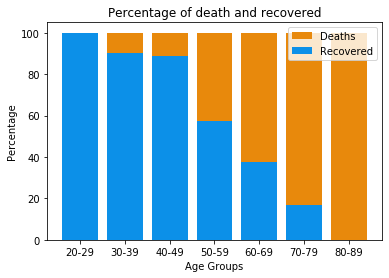

In [192]:
total_state_count = grouped_states.released + grouped_states.deceased
percent_released = grouped_states.released / total_state_count *100
percent_death = grouped_states.deceased / total_state_count *100

plt.bar(grouped_states.index, percent_released + percent_death, label= 'Deaths', color='#e8890c')
plt.bar(grouped_states.index, percent_released, label='Recovered',color='#0c90e8')
plt.legend()
plt.title('Percentage of death and recovered')
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
plt.show()

Hence, recovery rate decreases with age. And deaths increases with age. We can verify this by looking in to the distribution.

Text(0.5, 0, 'Age')

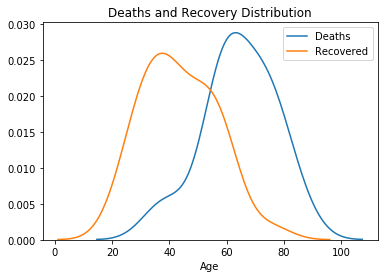

In [199]:
sns.kdeplot(patient_df[patient_df['state'] == 'deceased']['age'], label='Deaths')
sns.kdeplot(patient_df[patient_df['state'] == 'released']['age'], label='Recovered')
plt.title('Deaths and Recovery Distribution')
plt.xlabel('Age')